In [1]:
import numpy as np
import pandas as pd
import csv
titletwo=np.zeros(225)
df = pd.read_csv("dataset_f.csv", index_col=False, header=None)
print(df.shape)

(1920, 227)


In [2]:
numpy_matrix = df.values
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]

C:\Users\ASUS\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  from ipykernel import kernelapp as app


(1920,)
salida
0.9640625 0.044141969313354276


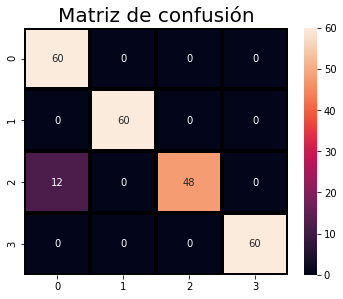

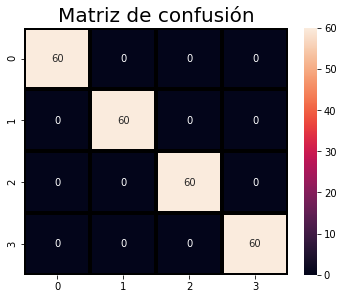

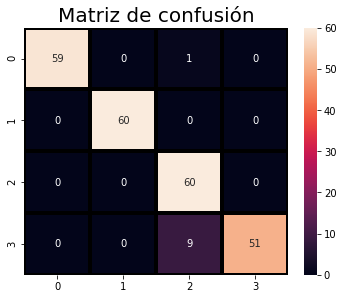

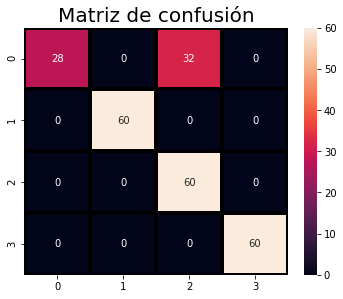

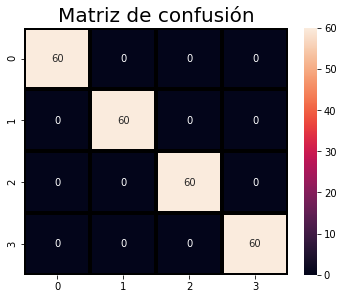

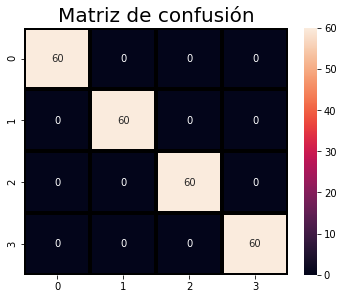

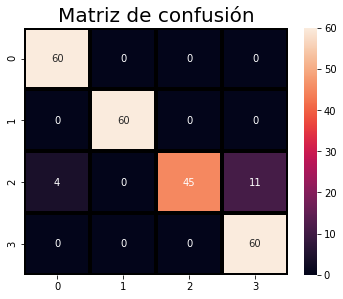

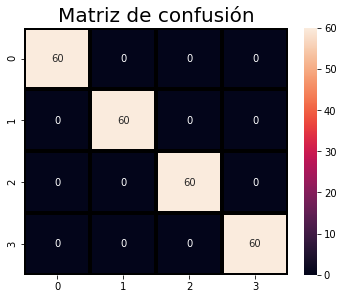

In [10]:
from sklearn.model_selection import GroupKFold
from sklearn.neural_network import MLPClassifier
from numpy import random
import math
import numpy.matlib
from scipy import stats
import scipy as sc
import operator
from scipy.spatial import distance
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
numpy_matrix = df.as_matrix()
#error = np.zeros(8)
X = numpy_matrix[:,0:225]
Y = numpy_matrix[:,225]
personsLabel = numpy_matrix[:,226]
X.shape


groups = np.array(personsLabel)
print(groups.shape)

group_kfold = GroupKFold(n_splits=8)
group_kfold.get_n_splits(X, Y, groups)
eficienciaTrain=np.zeros(8)
eficienciaTest=np.zeros(8)
j=0
for train_index, test_index in group_kfold.split(X, Y, groups):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = Y[train_index], Y[test_index]
    
    media = np.mean(X_train)
    desvia = np.std(X_train)
    Xtrain = sc.stats.stats.zscore(X_train)
    Xtest = (X_test - np.matlib.repmat(media, X_test.shape[0], 1))/np.matlib.repmat(desvia, X_test.shape[0], 1)
    
    
    parameters = {'hidden_layer_sizes':[225,450],
                  'activation':['identity', 'logistic', 'tanh', 'relu'],
                  'max_iter':[500]}
    groups = np.array(personsLabel)
    group_kfold = GroupKFold(n_splits=7)

   
    #ann = MLPClassifier(hidden_layer_sizes=(100,100,100), max_iter=500, alpha=0.0001,solver='sgd', verbose=10,  random_state=21,tol=0.000000001)
    ann=MLPClassifier()
    
    
    clf = GridSearchCV(ann, parameters, cv=group_kfold.split(X_train, y_train, groups[train_index]))
    clf.fit(X_train,y_train)
    
    y_predTrain=clf.predict(X_train)
    y_predTest=clf.predict(X_test)
    
    plt.figure(figsize=(13,10))
    plt.subplot(221)
    sns.heatmap(confusion_matrix(y_test, y_predTest),annot=True,fmt = "d",linecolor="k",linewidths=3)
    plt.title("Matriz de confusión",fontsize=20)
    
   
    eficienciaTrain[j]=np.mean(y_predTrain.ravel() == y_train.ravel())
    eficienciaTest[j]=np.mean(y_predTest.ravel() == y_test.ravel())
    j=j+1
    
    
print('salida')
print (str(np.mean(eficienciaTest)),str(np.std(eficienciaTest)))

    
    


In [4]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
y_predicted=clf.predict(Xtest)
print(y_predicted)

print(X_test.shape,y_test.shape)
print(y_predicted.shape)
print('Accuracy: ', accuracy_score(y_test, y_predicted), '\n')
report = classification_report(y_test, y_predicted)
print("\nclassification report :\n",report )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
(240, 225) (240,)
(240,)
Accuracy:  1.0 


classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        60
         2.0       1.00      1.00     

In [16]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score,roc_curve,auc
y_predict=clf.predict(X_test)

print(y_predict)
print('Accuracy: ', accuracy_score(y_test, y_predict), '\n')
report = classification_report(y_test, y_predict)
print("\nclassification report :\n",report )

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]
Accuracy:  1.0 


classification report :
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00        60
         1.0       1.00      1.00      1.00        60
         2.0       1.00      1.00      1.00        60
         

In [11]:
df=clf.cv_results_
df2=pd.DataFrame(df)
df2

C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
C:\Users\ASUS\Anaconda3\lib\site-packages\sklearn\utils\de

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_activation,param_hidden_layer_sizes,param_max_iter,params,split0_test_score,split1_test_score,...,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,mean_train_score,std_train_score
0,1.259429,0.221631,0.002214,0.000365,identity,225,500,"{'activation': 'identity', 'hidden_layer_sizes...",0.937500,1.000000,...,4,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
1,2.221573,0.138178,0.003428,0.001050,logistic,225,500,"{'activation': 'logistic', 'hidden_layer_sizes...",0.904167,1.000000,...,1,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
2,1.874143,0.205441,0.001857,0.000350,tanh,225,500,"{'activation': 'tanh', 'hidden_layer_sizes': 2...",0.929167,1.000000,...,3,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0
3,1.137712,0.115482,0.002575,0.000498,relu,225,500,"{'activation': 'relu', 'hidden_layer_sizes': 2...",0.925000,0.979167,...,2,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0


Text(0.5, 1.0, 'Matriz de confusión')

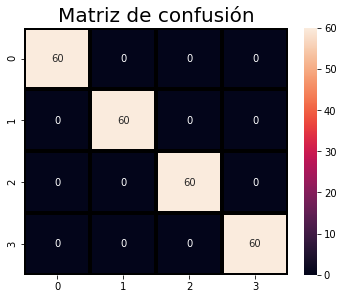

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(13,10))
plt.subplot(221)
sns.heatmap(confusion_matrix(y_test, y_predicted),annot=True,fmt = "d",linecolor="k",linewidths=3)
plt.title("Matriz de confusión",fontsize=20)